Import necessary libraries:


In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from PIL import Image
from io import BytesIO
import ast
from collections import Counter

In [266]:
# Displaying all columns in jupyter output
pd.set_option('display.max_columns', None)

Read the data.


In [302]:
df = pd.read_csv('DigiKala.csv')

How many null values do we have in each column?


In [268]:
df.isnull().sum()

data_product_id                                                854
data_product_title_fa                                          854
data_product_status                                            854
data_product_has_quick_view                                    854
data_product_data_layer_brand                                  854
data_product_data_layer_category                               854
data_product_data_layer_item_category2                         854
data_product_data_layer_item_category4                        2450
data_product_data_layer_item_category5                       16377
data_product_product_type                                      854
data_product_digiplus_services                                 859
data_product_digiplus_is_jet_eligible                          859
data_product_digiplus_cash_back                                859
data_product_digiplus_is_general_location_jet_eligible         859
data_product_digiplus_fast_shipping_text                     5

One-hot encode the column 'data_product_status'


In [269]:
df = pd.get_dummies(df, columns=['data_product_status'])
df.head()

,data_product_id,data_product_title_fa,data_product_has_quick_view,data_product_data_layer_brand,data_product_data_layer_category,data_product_data_layer_item_category2,data_product_data_layer_item_category4,data_product_data_layer_item_category5,data_product_product_type,data_product_digiplus_services,data_product_digiplus_is_jet_eligible,data_product_digiplus_cash_back,data_product_digiplus_is_general_location_jet_eligible,data_product_digiplus_fast_shipping_text,data_product_images_main_url,data_product_images_main_thumbnail_url,data_product_images_main_temporary_id,data_product_rating_rate,data_product_rating_count,data_product_colors,data_product_default_variant_properties_is_fast_shipping,data_product_default_variant_properties_is_ship_by_seller,data_product_default_variant_seller_title,data_product_default_variant_seller_stars,data_product_default_variant_seller_grade_label,data_product_default_variant_seller_registration_date,data_product_default_variant_digiclub_point,data_product_default_variant_price_is_incredible,data_product_default_variant_price_is_promotion,data_product_default_variant_price_is_locked_for_digiplus,data_product_default_variant_price_bnpl_active,data_product_default_variant_price_discount_percent,data_product_default_variant_shipment_methods_description,data_product_properties_is_fast_shipping,data_product_properties_is_ship_by_seller,data_product_properties_min_price_in_last_month,data_product_properties_is_ad,data_product_properties_ad,data_product_properties_is_jet_eligible,data_product_properties_is_medical_supplement,data_product_properties_has_printed_price,data_product_badges,data_product_category_title_fa,data_product_category_return_reason_alert,data_product_brand_id,data_product_brand_code,data_product_brand_logo_url,data_product_comments_count,data_product_status_marketable,data_product_status_out_of_stock
0,1595827.0,قطار اسباب بازی کد 45,False,متفرقه,"[BT,اسباب بازی]",اسباب بازی، کودک و نوزاد,اسباب بازی,ماشین، هواپیما و قطار,product,['ارسال رایگان'],False,0.0,False,NaN,['https://dkstatics-public.digikala.com/digika...,NaN,NaN,88.0,26.0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,0.0,False,[],False,False,False,[],قطار,"درخواست مرجوع کردن کالا در گروه قطار با دلیل ""...",719.0,miscellaneous,['https://dkstatics-public.digikala.com/digika...,22.0,0,1
1,11778488.0,سطل زباله پدالی همارا مدل 20,False,همارا,"[HW,نظافت]",خانه و آشپزخانه,لوازم نظافت,سطل,product,['ارسال رایگان'],False,0.0,False,NaN,['https://dkstatics-public.digikala.com/digika...,NaN,NaN,74.0,3.0,"[{'id': 65, 'title': 'کالباسی', 'hex_code': '#...",False,False,رنگارنگ بهاران,2.85,خوب,3 سال و 9 ماه,60.0,False,False,False,True,0.0,موجود در انبار فروشنده,False,False,4700000.0,False,[],False,False,False,[],سطل,"درخواست مرجوع کردن کالا در گروه سطل با دلیل ""ا...",2322.0,homara,['https://dkstatics-public.digikala.com/digika...,1.0,1,0
2,10320313.0,محافظ ولتاژ گرین لاین مدل GLP162,False,گرین لاین,"[TC,نور و روشنایی]",خانه و آشپزخانه,لوازم جانبی صوتی و تصویری,چندراهی برق و محافظ ولتاژ,product,['ارسال رایگان'],False,0.0,False,NaN,['https://dkstatics-public.digikala.com/digika...,NaN,NaN,86.0,89.0,"[{'id': 2, 'title': 'سفید', 'hex_code': '#FFFF...",False,False,درودیان لامپ دونی,1.40,ضعیف,3 ماه و 1 هفته,24.0,False,False,False,True,0.0,موجود در انبار فروشنده,False,False,2112600.0,False,[],False,False,False,[],چندراهی برق و محافظ ولتاژ,درخواست مرجوع کردن کالا در گروه چندراهی برق و ...,21442.0,green-line,['https://dkstatics-public.digikala.com/digika...,78.0,1,0
3,3439034.0,شکم بند لاغری طب و صنعت کد 62200,True,طب و صنعت,"[HP,ابزار سلامت خانگی]",زیبایی و سلامت,ارتوپدی و کمک درمانی,ساپورت های تنه,product,"['ارسال رایگان', 'ارسال فوری برای شهر تهران (ر...",True,0.0,False,ارسال فردا,['https://dkstatics-public.digikala.com/digika...,NaN,NaN,84.0,428.0,[],False,False,پزشکی اکسیژن,5.00,عالی,5 سال و 10 ماه,23.0,False,False,False,True,21.0,موجود در انبار دیجی‌کالا,False,False,1981700.0,False,[],False,False,False,[],ساپورت های ت

Make the column 'data_product_has_quick_view' binary.


In [270]:
df['data_product_has_quick_view'] = df['data_product_has_quick_view'].apply(lambda x: 1 if x else 0)
df['data_product_has_quick_view']

0        0
1        0
2        0
3        1
4        0
        ..
71065    1
71066    1
71067    0
71068    0
71069    0
Name: data_product_has_quick_view, Length: 71070, dtype: int64

Make another dataframe called "data_product_data_layer_categories" from the column "data_product_data_layer_category"
<br/>
Each product must have a row, which the categories are neither 0 nor 1.
<br/>
for example, one row can be like this with the following columns(the columns must be in Persian):
<br/>
<br/>
data_product_id: 1595827.0
<br/>
اسباب بازی = 1
<br/>
ابزار سلامت خانگی = 0


In [271]:
def remove_first_split(value):
    if isinstance(value, str):
        # Split the string by comma and keep everything except the first part to keep the Persian
        parts = value.split(',')
        return ','.join(parts[1:]).strip()
    return value

# Apply the function to the column
df['data_product_data_layer_category'] = df['data_product_data_layer_category'].apply(remove_first_split)


In [272]:
data_product_data_layer_categories = df['data_product_data_layer_category'].str.get_dummies(sep=',')
data_product_data_layer_categories.columns = [col.strip() for col in data_product_data_layer_categories.columns]
data_product_data_layer_categories.insert(0, 'data_product_id', df['data_product_id'])

In [273]:
data_product_data_layer_categories.head()

,data_product_id,GF],آرایش صورت],آلات موسیقی],آویز و جاسوییچی دخترانه],آویز و جاسوییچی کودک],آویز و جاسوییچی],ابزار آشپزی],ابزار برقی],ابزار دستی],ابزار دقیق و اندازه گیری],ابزار سلامت خانگی الکترونیک],ابزار سلامت خانگی],ابزار سلامت],ابزار علمی],ابزار مراقبت از پوست],اتو],ادویه و چاشنی محلی],ارگانایزر],اسباب بازی],اسپیکر],انواع کنسرو],اکسسوری دخترانه],اکسسوری مو زنانه],اکسسوری نوزاد],اکسسوری ورزشی زنانه و مردانه],اکسسوری ورزشی زنانه],اکسسوری ورزشی مردانه],اکسسوری ورزشی پسرانه],ایمنی و مراقبت کودک],باتری و شارژر استاندارد],بالاپوش و دامن],برس ها و تجهیزات آرایشی صورت],برنج محلی],بلوز و شومیز دخترانه],بلوز و شومیز زنانه],بلوز و شومیز پسرانه],بهداشت دهان و دندان],بهداشت و زیبایی ناخن],بهداشت کودک],بوت دخترانه],بوت زنانه],بوت ساق بلند زنانه],بوت مردانه],بوت نوزاد],بوت پسرانه],تاپ مردانه],تاپ پسرانه],تاپ، تونیک و سارافون زنانه],تبلت],تجهیزات آرایشی],تجهیزات ایمنی و کار],تجهیزات جانبی لپ تاپ],تجهیزات ذخیره سازی اطلاعات],تجهیزات سفر],تجهیزات شبکه اکتیو],تجهیزات شبکه پسیو],تجهیزات صوتی خودرو و لوازم جانبی],تجهیزات پخت و‌ پز ،فر و تهویه آشپزخانه],تخم مرغ و دیگر پرندگان],تخمه و مغز طعم‌دار],تسبیح],تصفیه آب و آبسردکن],تلفن],تلویزیون],تنقلات],تهویه، سرمایش و گرمایش بزرگ],تهویه، سرمایش و گرمایش کوچک],تونیک زنانه],تی شرت و پولو شرت دخترانه],تی شرت و پولو شرت مردانه],تی شرت و پولو شرت پسرانه],تی‌شرت و پولوشرت زنانه],تی‌شرت و پولوشرت مردانه],جوراب بچگانه],جوراب زنانه و مردانه],جوراب زنانه],جوراب مردانه],جوراب ورزشی زنانه],جوراب ورزشی مردانه],جین دخترانه],جین زنانه],جین مردانه],جین پسرانه],حبوبات و سویا],حشره کش و سوسک کش],حفاظتی و امنیتی],حلوا شکری، ارده و کنجد خانگی],حمام و سرویس بهداشتی],خاویار],خرما],خشکبار و آجیل],خشکبار و شیرینی],خمیر],خواب کودک],خواب],خوار و بار],خوشبو کننده],خیارشور و ترشیجات خانگی],دامن],دستمال],دستکش ، دستگیره ، دم کنی],دستکش دخترانه],دستکش زنانه و مردانه],دستکش زنانه],دستکش مردانه],دستکش نوزاد],دسر آماده],دمنوش های بومی],دمپایی زنانه],دمپایی لاانگشتی زنانه],دمپایی لاانگشتی مردانه],دمپایی مردانه],دمپایی نوزاد],دمپایی پسرانه],دوربین و تجهیزات امنیتی],دوربین],دوغ],دوچرخه و اسکوتر],دکور و اتاق کودک],دکوراتیو],رب گوجه خانگی],رشته خانگی],زعفران، زرشک ارگانیک],زیورآلات دخترانه],زیورآلات زنانه و مردانه],زیورآلات زنانه],زیورآلات طلا دخترانه],زیورآلات طلا زنانه و مردانه],زیورآلات طلا زنانه],زیورآلات طلا مردانه],زیورآلات مردانه],زیورآلات نقره زنانه و مردانه],زیورآلات نقره زنانه],زیورآلات نقره مردانه],ساعت دخترانه],ساعت زنانه و مردانه],ساعت زنانه],ساعت مردانه],ساعت هوشمند],ساعت پسرانه],سبزی خشک محلی],ست لباس دخترانه],ست لباس زیر زنانه],ست لباس پسرانه پسرانه],ست نوزاد نوزاد],ست هدیه زنانه و مردانه],ست هدیه زنانه],ست هدیه مردانه],سرو و پذیرایی],سرپوش دخترانه],سرپوش زنانه و مردانه],سرپوش زنانه],سرپوش مردانه],سرپوش نوزاد],سرپوش پسرانه],سرگرمی و فکری],سوسیس و کالباس],سویشرت زنانه],سویشرت مردانه],سویشرت و هودی بچگانه],سویشرت و هودی زنانه],سویشرت و هودی مردانه],شال و روسری زنانه و مردانه],شال و روسری زنانه],شال و روسری مردانه],شست و شو و نظافت],شلوار زنانه],شلوار مردانه],شلوار و سرهمی دخترانه و پسرانه],شلوار و سرهمی نوزاد],شلوار و سرهمی پسرانه],شلوارک زنانه],شلوارک مردانه],شور و ترشیجات],شوینده],شکلات دست ساز],شیر],صبحانه],صنایع دستی],صندل دخترانه],صندل زنانه],صندل مردانه],صندل نوزاد],صندل پسرانه],صیفی و سبزیجات],عرقیات و گلاب محلی],عطر و ادوکلن],عینک و لوازم جانبی دخترانه],عینک و لوازم جانبی زنانه و مردانه],عینک و لوازم جانبی زنانه],عینک و لوازم جانبی مردانه],غذا و مکمل حیوانات],غذا ساز],غذای آبزیان],غذای منجمد و یخچالی],غذای کودک],غلات ارگانیک],فرش],فندک],قطعات کامپیوتر],قند و نبات محلی],قهوه محلی],لباس بافتنی دخترانه],لباس بافتنی پسرانه],لباس راحتی و خواب بچگانه],لباس راحتی و خواب زنانه],لباس راحتی و خواب مردانه],لباس زیر دخترانه],لباس زیر مردانه],لباس زیر پسرانه],لباس شنا دخترانه],لباس شنا زنانه],لباس شنا مردانه],لباس شنا پسرانه],لباس مجلسی بچگانه],لباس کودک],لوازم آرایش موی سر],لوازم اصلاح],لوازم التحریر],لوازم الکتریکی ساختمان],لوازم برقی پخت و پز],لوازم بهداشتی مصرفی],لوازم تخصصی پزشکی],لوازم تغذیه کودک],لوازم جانبی تلویزیون],لوازم جانبی خودرو و موتورسیکلت],لوازم جانبی دوربین],لوازم جانبی ساعت هوشمند],لوازم جانبی ساعت],لوازم جا

Make another data frame according to the 'data_product_data_layer_category' named 'data_product_data_layer_category_mapping'
<br/>
in this data frame, we have two columns that maps the English abbreviation to the Persian category.


In [303]:
def split_category(value):
    if isinstance(value, str):
        parts = value.split(',')  # Split the string by comma
        # Remove brackets and handle different cases
        if len(parts) == 2:  # Expected case: two parts
            english = parts[0].replace("[", "").strip()  # Remove "[" and strip spaces
            persian = parts[1].replace("]", "").strip()  # Remove "]" and strip spaces
            return english, persian
        elif len(parts) == 1:  # Only one part
            english = parts[0].replace("[", "").replace("]", "").strip()
            return english, None
    return None, None

# Apply the function to the Series
split_data = df['data_product_data_layer_category'].apply(split_category)

# Convert the resulting Series of tuples into a DataFrame
data_product_data_layer_category_mapping = pd.DataFrame(
    split_data.tolist(), columns=['English', 'Persian']
)

# Display the result
print(data_product_data_layer_category_mapping)

      English                    Persian
0          BT                 اسباب بازی
1          HW                      نظافت
2          TC              نور و روشنایی
3          HP          ابزار سلامت خانگی
4          TC              نور و روشنایی
...       ...                        ...
71065      PC        لوازم بهداشتی مصرفی
71066      HC              سرو و پذیرایی
71067      PC                لوازم اصلاح
71068      TC  ابزار دقیق و  اندازه گیری
71069      MO                گوشی موبایل

[71070 rows x 2 columns]


Filter the rows in the data frame with the following values:
<br/>
<br/>
data_product_data_layer_brand = سامسونگ
<br/>
data_product_data_layer_item_category2 = کالای دیجیتال
<br/>
&&
<br/>
data_product_data_layer_brand = اپل
<br/>
data_product_data_layer_item_category2 = کالای دیجیتال

<br/>
calculate the count of each.


In [275]:
filtered_samsung = df[(df['data_product_data_layer_brand'] == 'سامسونگ') & 
                      (df['data_product_data_layer_item_category2'] == 'کالای دیجیتال')]
filtered_apple = df[(df['data_product_data_layer_brand'] == 'اپل') & 
                    (df['data_product_data_layer_item_category2'] == 'کالای دیجیتال')]
print("Samsung Count:", len(filtered_samsung))
print("Apple Count:", len(filtered_apple))

Samsung Count: 143
Apple Count: 92


What are the 10 most repeated categories in 'data_product_data_layer_item_category4' with their relative percentage?


In [276]:
top_categories = df['data_product_data_layer_item_category4'].value_counts(normalize=True).head(10) * 100
top_categories

لوازم جانبی گوشی موبایل    6.693384
اسباب بازی                 3.536870
مراقبت پوست                2.610026
لباس مردانه                2.372486
مبلمان و دکوراسیون         2.190324
لباس زنانه                 2.171379
اکسسوری زنانه              2.008161
نوشت افزار                 1.935296
لوازم تزئینی خودرو         1.515593
اکسسوری زنانه و مردانه     1.454386
Name: data_product_data_layer_item_category4, dtype: float64

How many distinct values are there in the 'data_product_product_type' column and what are they?


In [277]:
print("Distinct Values:", df['data_product_product_type'].nunique())
df['data_product_product_type'].dropna().unique()

Distinct Values: 3


array(['product', 'giftcard', 'dk_electronic_gift_card'], dtype=object)

Filter the rows that both columns 'data_product_digiplus_services' and 'data_product_digiplus_is_jet_eligible' are true in them.


In [278]:
filtered_df = df[(df['data_product_has_quick_view'] == True) & 
                 (df['data_product_digiplus_is_jet_eligible'] == True)]
filtered_df.head()

,data_product_id,data_product_title_fa,data_product_has_quick_view,data_product_data_layer_brand,data_product_data_layer_category,data_product_data_layer_item_category2,data_product_data_layer_item_category4,data_product_data_layer_item_category5,data_product_product_type,data_product_digiplus_services,data_product_digiplus_is_jet_eligible,data_product_digiplus_cash_back,data_product_digiplus_is_general_location_jet_eligible,data_product_digiplus_fast_shipping_text,data_product_images_main_url,data_product_images_main_thumbnail_url,data_product_images_main_temporary_id,data_product_rating_rate,data_product_rating_count,data_product_colors,data_product_default_variant_properties_is_fast_shipping,data_product_default_variant_properties_is_ship_by_seller,data_product_default_variant_seller_title,data_product_default_variant_seller_stars,data_product_default_variant_seller_grade_label,data_product_default_variant_seller_registration_date,data_product_default_variant_digiclub_point,data_product_default_variant_price_is_incredible,data_product_default_variant_price_is_promotion,data_product_default_variant_price_is_locked_for_digiplus,data_product_default_variant_price_bnpl_active,data_product_default_variant_price_discount_percent,data_product_default_variant_shipment_methods_description,data_product_properties_is_fast_shipping,data_product_properties_is_ship_by_seller,data_product_properties_min_price_in_last_month,data_product_properties_is_ad,data_product_properties_ad,data_product_properties_is_jet_eligible,data_product_properties_is_medical_supplement,data_product_properties_has_printed_price,data_product_badges,data_product_category_title_fa,data_product_category_return_reason_alert,data_product_brand_id,data_product_brand_code,data_product_brand_logo_url,data_product_comments_count,data_product_status_marketable,data_product_status_out_of_stock
3,3439034.0,شکم بند لاغری طب و صنعت کد 62200,1,طب و صنعت,ابزار سلامت خانگی],زیبایی و سلامت,ارتوپدی و کمک درمانی,ساپورت های تنه,product,"['ارسال رایگان', 'ارسال فوری برای شهر تهران (ر...",True,0.0,False,ارسال فردا,['https://dkstatics-public.digikala.com/digika...,NaN,NaN,84.0,428.0,[],False,False,پزشکی اکسیژن,5.0,عالی,5 سال و 10 ماه,23.0,False,False,False,True,21.0,موجود در انبار دیجی‌کالا,False,False,1981700.0,False,[],False,False,False,[],ساپورت های تنه,درخواست مرجوع کردن کالا در گروه ساپورت های تنه...,3733.0,teb-and-sanat,['https://dkstatics-public.digikala.com/digika...,376.0,1,0
15,752091.0,چای سبز سحرخیز مقدار 100 گرم,1,سحرخیز,نوشیدنی],کالاهای سوپرمارکتی,چای,چای سبز,product,"['ارسال رایگان', 'ارسال فوری برای شهر تهران (ر...",True,0.0,False,ارسال فردا,['https://dkstatics-public.digikala.com/digika...,NaN,NaN,82.0,370.0,[],True,False,دیجی‌کالا,5.0,عالی,7 سال و 6 ماه,5.0,False,False,False,True,0.0,موجود در انبار دیجی‌کالا,True,False,0.0,False,[],False,False,True,[],چای سبز,NaN,9193.0,saharkhiz,['https://dkstatics-public.digikala.com/digika...,193.0,1,0
51,8419891.0,قوزبند طبی کد Pro-8443,1,متفرقه,ابزار سلامت خانگی],زیبایی و سلامت,ارتوپدی و کمک درمانی,ساپورت های تنه,product,"['ارسال رایگان', 'ارسال فوری برای شهر تهران (ر...",True,0.0,False,ارسال فردا,['https://dkstatics-public.digikala.com/digika...,NaN,NaN,74.0,6.0,[],False,False,اودمان مارکت,3.4,خیلی خوب,3 سال و 2 ماه,20.0,False,True,False,True,20.0,موجود در انبار دیجی‌کالا,False,False,1990000.0,False,[],False,False,False,[],ساپورت های تنه,درخواست مرجوع کردن کالا در گروه ساپورت های تنه...,719.0,miscellaneous,['https://dkstatics-public.digikala.com/digika...,10.0,1,0
105,6781609.0,اسپری دو فاز مو لویز مدل Dry and Damaged Hair ...,1,متفرقه,مراقبت مو],زیبایی و سلامت,شامپو و مراقبت مو,سرم و اسپری مو,product,"['ارسال رایگان', 'ارسال فوری برای شهر تهران (ر...",True,0.0,False,ارسال فردا,['https://dkstatics-public.digikala.com/digika...,NaN,NaN,84.0,74.0,[],False,False,آرمیس بیوتی,4.2,عالی,1 سال و 5 ماه,11.0,False,False,False,True,0.0,موجود در انبار دیجی‌کالا,False,False,999900.0,False,[],False,False,False,[],سرم و اسپری مو,درخواست مرجوع ک

What values are in the following columns? What useful information do they have?:
<br/>
<br/>
'data_product_digiplus_cash_back'
<br/>
'data_product_digiplus_is_general_location_jet_eligible'
<br/>
'data_product_images_main_thumbnail_url'
<br/>
'data_product_images_main_temporary_id'


In [279]:
for col in ['data_product_digiplus_cash_back', 
            'data_product_digiplus_is_general_location_jet_eligible',
            'data_product_images_main_thumbnail_url',
            'data_product_images_main_temporary_id']:
    print(f"{col} Unique Values: {df[col].nunique()}")
    print(df[col].value_counts().head())

data_product_digiplus_cash_back Unique Values: 1
0.0    70211
Name: data_product_digiplus_cash_back, dtype: int64
data_product_digiplus_is_general_location_jet_eligible Unique Values: 1
False    70211
Name: data_product_digiplus_is_general_location_jet_eligible, dtype: int64
data_product_images_main_thumbnail_url Unique Values: 0
Series([], Name: data_product_images_main_thumbnail_url, dtype: int64)
data_product_images_main_temporary_id Unique Values: 0
Series([], Name: data_product_images_main_temporary_id, dtype: int64)


Plot the hist plot of the column 'data_product_digiplus_fast_shipping_text'


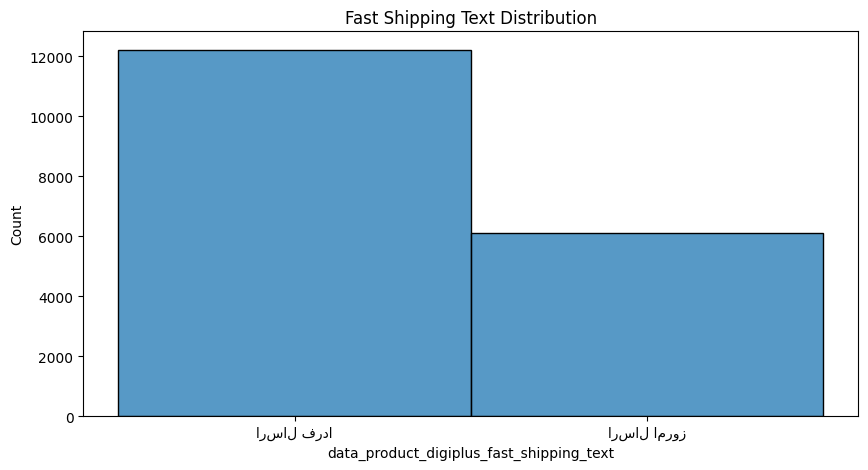

In [280]:
plt.figure(figsize=(10, 5))
sns.histplot(df['data_product_digiplus_fast_shipping_text'].dropna(), kde=False)
plt.title("Fast Shipping Text Distribution")
plt.show()

Write a code that downloads the images in the 'data_product_images_main_url' column automatically.
<br/>
Run the code for 10 random rows and then plot the images using matplotlib.


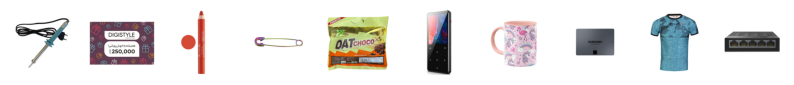

In [281]:
# Function to download and open an image from a URL
def fetch_image(url):
    response = requests.get(url, timeout=10)
    response.raise_for_status()
    return Image.open(BytesIO(response.content))

# Sample 10 URLs, clean them, and fetch images
image_urls = df['data_product_images_main_url'].dropna().sample(10).apply(lambda url: url.strip("[]'\"")).tolist()
images = [fetch_image(url) for url in image_urls]

# Filter out invalid images
valid_images = [img for img in images if img]

# Plot images if valid images exist
if valid_images:
    fig, axes = plt.subplots(1, len(valid_images), figsize=(10, 5))
    for img, ax in zip(valid_images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.show()
else:
    print("No images were successfully downloaded.")


Plot the distribution of the 'data_product_rating_rate' column.


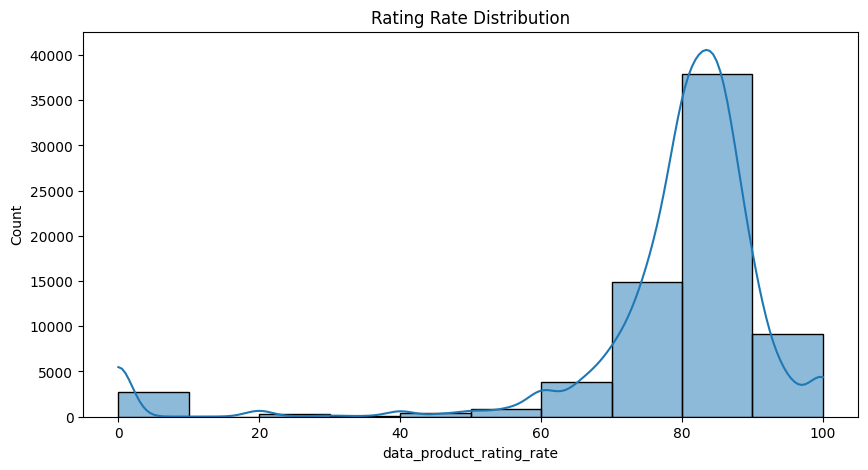

In [282]:
plt.figure(figsize=(10, 5))
sns.histplot(df['data_product_rating_rate'], kde=True, bins=10)
plt.title("Rating Rate Distribution")
plt.show()

Make another column based on the column 'data_product_rating_rate,' that has 10 values, 1 to 5.
<br/>
Each rate value must be categorized into one of these 5 categories based on the following rules.
<br/>
<br/>
0<rate<20 ==> A
<br/>
20<rate<40 ==> B
<br/>
40<rate<60 ==> C
<br/>
60<rate<80 ==> D
<br/>
80<rate<100 ==> E


In [283]:
def categorize_rate(rate):
    if rate < 20:
        return 'A'
    elif rate < 40:
        return 'B'
    elif rate < 60:
        return 'C'
    elif rate < 80:
        return 'D'
    else:
        return 'E'

df['rating_category'] = df['data_product_rating_rate'].apply(categorize_rate)
df['rating_category'].head()

0    E
1    D
2    E
3    E
4    E
Name: rating_category, dtype: object

What are the 5 products that have the most rate counts based on the column 'data_product_rating_count'?


In [284]:
top_rated_products = df.nlargest(5, 'data_product_rating_count')[['data_product_id', 'data_product_title_fa', 'data_product_rating_count']]
top_rated_products

,data_product_id,data_product_title_fa,data_product_rating_count
67461,86862.0,پایه نگهدارنده گوشی و تبلت مدل OK Stand,59877.0
17228,1075369.0,پایه نگهدارنده شارژر موبایل مدل Hng 0229,34191.0
65576,1437063.0,برس پاک‌سازی مدل beauty skin,30793.0
58151,5086666.0,هدفون بلوتوثی مدل inPods 12,27491.0
63263,3501717.0,ماسک تنفسی مدل ملت بلون بسته 51 عددی,26890.0


Add a new column 'data_product_color_ids' so that we only have the list of color 'id's of the product in the column.
<br/>
Then plot the distribution of the 20 most used product colors.
<br/>
What is the most used color in the products?


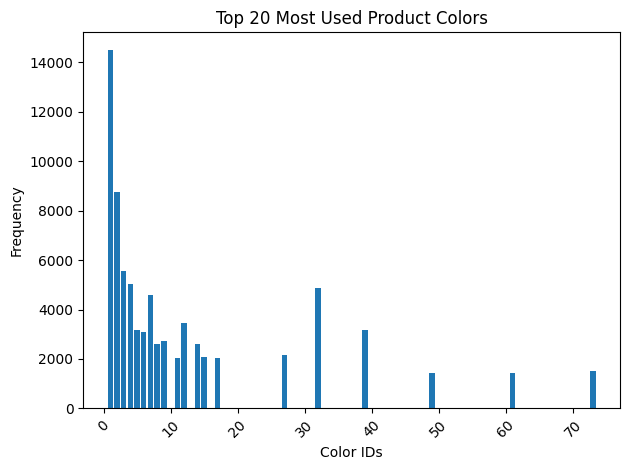

The most used color: 1 which is used 14494 times.


In [285]:
# Extract color id directly
df['data_product_color_ids'] = df['data_product_colors'].apply(
    lambda color_data: [color['id'] for color in ast.literal_eval(color_data) if 'id' in color]
    if isinstance(color_data, str) else []
)

all_color_ids = [color_id for color_list in df['data_product_color_ids'] for color_id in color_list]
color_counts = Counter(all_color_ids)

# Step 4: Get the top 20 most used colors
top_20_colors = color_counts.most_common(20)

# Plot the distribution
color_ids, counts = zip(*top_20_colors)
plt.figure()
plt.bar(color_ids, counts)
plt.title('Top 20 Most Used Product Colors')
plt.xlabel('Color IDs')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# The most used color
most_used_color = top_20_colors[0]
print(f"The most used color: {most_used_color[0]} which is used {most_used_color[1]} times.")


Make another data frame called 'color_map' that maps the id of the color to the 'hex_code' and 'title' of the color based on the 'data_product_colors' column.


In [286]:
# Extract color information and create a list of dictionaries
color_info = []
for color_data in df['data_product_colors'].dropna():
    for color in ast.literal_eval(color_data):
        if 'id' in color and 'hex_code' in color and 'title' in color:
            color_info.append({
                'id': color['id'],
                'hex_code': color['hex_code'],
                'title': color['title']
            })

# Create a DataFrame from the list of dictionaries
color_map = pd.DataFrame(color_info).drop_duplicates().reset_index(drop=True)
color_map.head()

,id,hex_code,title
0,65,#ffb1b9,کالباسی
1,1,#212121,مشکی
2,66,#b498a1,صورتی خاکستری
3,39,#e0e0e0,طوسی
4,55,#443c3c,مشکی مات


Filter the rows that the seller has "کالا" in their name based on data_product_default_variant_seller_title column,
<br/>
How many rows each one has?
<br/>
How many null values are in this column?


In [287]:
filtered_sellers = df[df['data_product_default_variant_seller_title'].str.contains('کالا', na=False)]
seller_counts = filtered_sellers['data_product_default_variant_seller_title'].value_counts()
null_count = df['data_product_default_variant_seller_title'].isnull().sum()
print(seller_counts)
print("\nNumber of null values: ", null_count)

دیجی‌کالا              2827
نوین کالا               221
تامین کالای ملودی        56
شهرزادبانوکالا           48
وان کالا                 43
                       ... 
کالای خواب متین           1
اسپرتی کالا               1
تامین کالای ستارگان       1
الف کالا                  1
کالاسنتر ارشیا            1
Name: data_product_default_variant_seller_title, Length: 448, dtype: int64

Number of null values:  13447


Create another data frame that maps the score of each seller to its name based on:<br/>
data_product_default_variant_seller_title<br/>
data_product_default_variant_seller_stars


In [288]:
seller_scores = df[['data_product_default_variant_seller_title', 'data_product_default_variant_seller_stars']].dropna().drop_duplicates()
seller_scores.columns = ['Seller Name', 'Seller Stars']
seller_scores.head()

,Seller Name,Seller Stars
1,رنگارنگ بهاران,2.85
2,درودیان لامپ دونی,1.40
3,پزشکی اکسیژن,5.00
4,فروشگاه ری,5.00
5,موندیال پلاس,3.80


What is the system of labeling in the 'data_product_default_variant_seller_grade_label' column?


In [289]:
df['data_product_default_variant_seller_grade_label'].dropna().unique()

array(['خوب', 'ضعیف', 'عالی', 'خیلی خوب', 'خیلی ضعیف', 'بدون عملکرد'],
      dtype=object)

Create another data frame named seller_history that maps the seller name to the count of months the seller is selling in DigiKala based on 'data_product_default_variant_seller_title' and 'data_product_default_variant_seller_registration_date' columns.


In [290]:
from datetime import datetime

# Function to calculate the number of months from registration date to now
def calculate_months(date_str):
    if pd.isna(date_str):
        return 0
    try:
        if 'سال' in date_str and 'ماه' in date_str:
            registration_date = datetime.strptime(date_str, '%d سال و %m ماه')
        elif 'ماه' in date_str:
            registration_date = datetime.strptime(date_str, '%m ماه')
        elif 'هفته' in date_str:
            weeks = int(date_str.split(' ')[0])
            return weeks // 4  # Convert weeks to months
        else:
            return 0
    except ValueError:
        return 0
    current_date = datetime.now()
    return (current_date.year - registration_date.year) * 12 + current_date.month - registration_date.month

# Apply the function to calculate months
df['months_selling'] = df['data_product_default_variant_seller_registration_date'].apply(calculate_months)

# Create the seller_history dataframe
seller_history = df.groupby('data_product_default_variant_seller_title')['months_selling'].sum().reset_index()
seller_history.columns = ['Seller Name', 'Months Selling']

seller_history.head()

,Seller Name,Months Selling
0,فروشگاه بانو,1490
1,ارزان کده نازنین,1497
2,برساد پلاس,0
3,دریم کالا,23968
4,زیورآلات لاچو,4478


Calculate the correlation between these columns based on appropriate method:<br/>
data_product_rating_count<br/>
data_product_comments_count<br/>
<br/>
data_intrack_eventData_unitPrice<br/>
data_product_properties_min_price_in_last_month<br/>


In [291]:
correlation_matrix = df[['data_product_rating_count', 
                         'data_product_comments_count', 
                         'data_product_default_variant_digiclub_point', 
                         'data_product_properties_min_price_in_last_month']].corr(method='pearson')
correlation_matrix

,data_product_rating_count,data_product_comments_count,data_product_default_variant_digiclub_point,data_product_properties_min_price_in_last_month
data_product_rating_count,1.000000,0.943665,-0.136966,-0.029575
data_product_comments_count,0.943665,1.000000,-0.117864,-0.024996
data_product_default_variant_digiclub_point,-0.136966,-0.117864,1.000000,0.252039
data_product_properties_min_price_in_last_month,-0.029575,-0.024996,0.252039,1.000000


Which columns of the following columns are better for being dropped?<br/>
Justify your answer.<br/><br/>
data_product_default_variant_price_is_incredible<br/>
data_product_default_variant_price_is_promotion<br/>
data_product_default_variant_price_is_locked_for_digiplus


In [292]:
columns_to_check = [
    'data_product_default_variant_price_is_incredible',
    'data_product_default_variant_price_is_promotion',
    'data_product_default_variant_price_is_locked_for_digiplus'
]

for col in columns_to_check:
    print(f"{col}\n{df[col].value_counts()}")

# So we must drop the first and third column.

data_product_default_variant_price_is_incredible
False    57480
True       143
Name: data_product_default_variant_price_is_incredible, dtype: int64
data_product_default_variant_price_is_promotion
False    43780
True     13843
Name: data_product_default_variant_price_is_promotion, dtype: int64
data_product_default_variant_price_is_locked_for_digiplus
False    57607
True        16
Name: data_product_default_variant_price_is_locked_for_digiplus, dtype: int64


### So we must drop the first and third column.

Show top 10 products data_product_title_fa that have the most discount percentage based on 'data_product_default_variant_price_discount_percent'


In [293]:
top_discounted_products = df.nlargest(10, 'data_product_default_variant_price_discount_percent')[['data_product_title_fa', 'data_product_default_variant_price_discount_percent']]
top_discounted_products

,data_product_title_fa,data_product_default_variant_price_discount_percent
13478,قرص فرورال گلدن لایف بسته 30 عددی,88.0
32180,قرص سلنیوم پلاس او پی دی فارما بسته 60 عددی,88.0
19241,فون عکاسی کروماکی لند مدل W کد 200-150,85.0
50256,عینک آفتابی امریکن اوپتیکال مدل BL,85.0
55282,قرص پرینامکس دیورینگ پرگننسی یوروویتال بسته 90...,84.0
41876,قرص را-کیوتن رها بسته 60 عددی,83.0
42608,قرص آهسته رهش آهن بیس گلیسینات+ویتامین ث هلث ا...,83.0
12912,سافت ژل ویتامین د3 1000 واحدی او پی دی فارما ب...,81.0
22285,کپسول سلنیوم پلاس دانا بسته 60 عددی,81.0
7766,خاک گلدان رویش یزد کد ROS12 حجم 12 لیتر,80.0


Calculate the percentage of each group in the 'data_product_default_variant_shipment_methods_description' column.


In [294]:
shipment_methods_percentage = df['data_product_default_variant_shipment_methods_description'].value_counts(normalize=True) * 100
shipment_methods_percentage

موجود در انبار فروشنده                53.061543
موجود در انبار دیجی‌کالا              31.243709
موجود در انبار فروشنده و دیجی‌کالا    14.087612
موجود در انبار داروخانه                1.603666
تامین توسط دیجی‌کالا                   0.003471
Name: data_product_default_variant_shipment_methods_description, dtype: float64

How many products have 'data_product_properties_is_fast_shipping' and 'data_product_properties_is_ship_by_seller' columns True?


In [295]:
fast_shipping_and_ship_by_seller = df[(df['data_product_properties_is_fast_shipping'] == True) & 
                                      (df['data_product_properties_is_ship_by_seller'] == True)]
count = len(fast_shipping_and_ship_by_seller)
print("Number of products with both fast shipping and ship by seller:", count)

Number of products with both fast shipping and ship by seller: 0


Drop the following columns:<br/>

data_product_properties_is_ad<br/>
data_product_properties_ad<br/>
data_product_properties_is_jet_eligible<br/>


In [296]:
df.drop(columns=['data_product_properties_is_ad', 
                 'data_product_properties_ad', 
                 'data_product_properties_is_jet_eligible'], inplace=True)

Extract the seller name that works in the medical field based on 'data_product_properties_is_medical_supplement'<br>
Then, from the 'seller_history' data frame, extract the seller's history.


In [297]:
medical_sellers = df[df['data_product_properties_is_medical_supplement'] == True]['data_product_default_variant_seller_title'].unique()
medical_seller_history = seller_history[seller_history['Seller Name'].isin(medical_sellers)]
medical_seller_history

,Seller Name,Months Selling
49,الین دارو,37349
89,داروخانه آقای دارو,11952
114,سفیرسلامتی,1492
614,آفا دارو,4479
1424,امن دارو,213070
1442,امیددارو,2996
1534,اول دارو,0
1792,ایکس دارو,0
2211,بانی دارو,113544
2399,بهدارو رسان,0


What is the count of each category in the 'data_product_category_title_fa' column?


In [298]:
category_counts = df['data_product_category_title_fa'].value_counts()
category_counts

کیف و کاور گوشی          2492
هدفون، هدست و هندزفری    1105
مکمل  دارویی              922
سایر لوازم خودرو          553
شامپو مو                  523
                         ... 
قایق و لوازم جانبی          2
ست رسمی دخترانه             2
تجهیزات دندانپزشکی          1
مسیریاب خودرو               1
ساپورت های گردن             1
Name: data_product_category_title_fa, Length: 1809, dtype: int64

Make a dataframe that maps the 'data_product_brand_id' to 'data_product_brand_code' and 'data_product_data_layer_brand'<br/>
the data frame contains 3 columns, and each row represents one brand.


In [299]:
brand_mapping = df[['data_product_brand_id', 'data_product_brand_code', 'data_product_data_layer_brand']].drop_duplicates().reset_index(drop=True)
brand_mapping.columns = ['Brand ID', 'Brand Code', 'Brand Name']
brand_mapping.head()

,Brand ID,Brand Code,Brand Name
0,719.0,miscellaneous,متفرقه
1,2322.0,homara,همارا
2,21442.0,green-line,گرین لاین
3,3733.0,teb-and-sanat,طب و صنعت
4,16392.0,samin-tc,سامین


Reuse your previous code for downloading and plotting the top 5 common brand logos from the 'data_product_brand_logo_url' column.

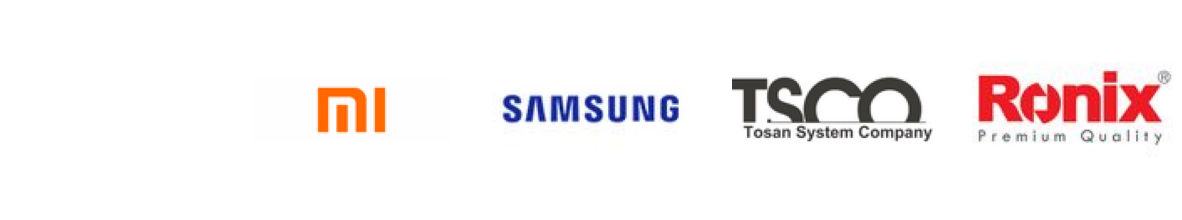

In [300]:
def fetch_image(url):
    response = requests.get(url, timeout=10)
    response.raise_for_status()
    return Image.open(BytesIO(response.content))

top_brands = df['data_product_brand_logo_url'].dropna().value_counts().head(5).index.tolist()
brand_images = [fetch_image(url.strip("[]'\"")) for url in top_brands]
fig, axes = plt.subplots(1, len(brand_images), figsize=(15, 5))
for img, ax in zip(brand_images, axes):
    ax.imshow(img)
    ax.axis('off')
plt.show()

Show top 5 products with the most comment count based on 'data_product_comments_count'


In [301]:
top_commented_products = df.nlargest(5, 'data_product_comments_count')[['data_product_id', 'data_product_title_fa', 'data_product_comments_count']]
top_commented_products

,data_product_id,data_product_title_fa,data_product_comments_count
58151,5086666.0,هدفون بلوتوثی مدل inPods 12,59213.0
67461,86862.0,پایه نگهدارنده گوشی و تبلت مدل OK Stand,46389.0
65576,1437063.0,برس پاک‌سازی مدل beauty skin,29190.0
17228,1075369.0,پایه نگهدارنده شارژر موبایل مدل Hng 0229,23643.0
15381,416286.0,ماشین اصلاح سر و صورت کیمی مدل KM-5017,21738.0
